<a href="https://colab.research.google.com/github/Madhusudan0626/soft-computing/blob/main/fuzzy_GA_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import math
import random
import skfuzzy.membership
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
A=[(1,0.8),(2,0.7),(3,0.1),(4,1.0),(5,0.9),(6,0.3)]
B=[(1,0.3),(2,0.4),(3,0.4),(4,1),(5,0),(6,0)]

In [ ]:
def algSum(A,B):
    sum=[]
    
    for i in A:
        for j in B:
            if i[0]==j[0]:
                sum.append((i[0],(i[1]+j[1]-i[1]*j[1])))
    return sum

                         
def cart(A,B):
    c=[]
    
    for i in A:
        for j in B:
            c.append(((i[0],j[0]), min(i[1],j[1])))
    return c
  
    
def union(A,B):
    union=[]

    for i in A:
        for j in B:
            if i[0] == j[0]:
                union.append((i[0],max(i[1],j[1])))

    return union
     
def intersect(A,B):
    intersection=[]
    for i in A:
        for j in B:
            if i[0] == j[0]:
                intersection.append((i[0],min(i[1],j[1])))
    return intersection
      
    
def complement(A):
    A_=[]
    for i in A:
        A_.append((i[0],1-i[1]))
    return A_

def diff(A,B):
    d=[]
    B_=complement(B)
    for i in A:
        for j in B_:
            if i[0]==j[0]:
                d.append((i[0],min(i[1],j[1])))
    return d  

In [ ]:
print("Set A : ", A,"\n")
print("Set B : ", B,"\n")

asum=algSum(A,B)
print("Algebraic sum: ",asum,"\n")

dif=diff(A,B)
print("Algebraic difference: ",dif,"\n")

c=cart(A,B)
print("Cartesian product: ",c,"\n")

u=union(A,B)
print("Union: ",u,"\n")

inter=intersect(A,B)
print("Intersection: ", inter,"\n")

com=complement(A)
print("Complement of A: ",com,"\n")

com=complement(B)
print("Complement of B: ",com,'\n')

print("complement(A) union complement(B): ", union(complement(A),complement(B)),"\n")
print("complement(A) intersection complement(B): ", intersect(complement(A),complement(B)))

In [ ]:
def test(A,B):
    sum=[]
    
    for i in A:
        for j in B:
            if i[0]==j[0]:
                sum.append((i[0]+j[0],min(i[1],j[1])))
            if i[0]+j[0]==i[0]:
              sum.append((i[0],min(i[1],j[1])))
            else:
              sum.append((j[0],min(i[1],j[1])))
    
    return sum
A=[(0,0.2),(1,1.0),(2,0.2)]
print(test(A,A))


[(0, 0.2), (0, 0.2), (1, 0.2), (2, 0.2), (1, 0.2), (2, 1.0), (1, 1.0), (2, 0.2), (2, 0.2), (1, 0.2), (4, 0.2), (2, 0.2)]


Enter a: 2
Enter b: 6


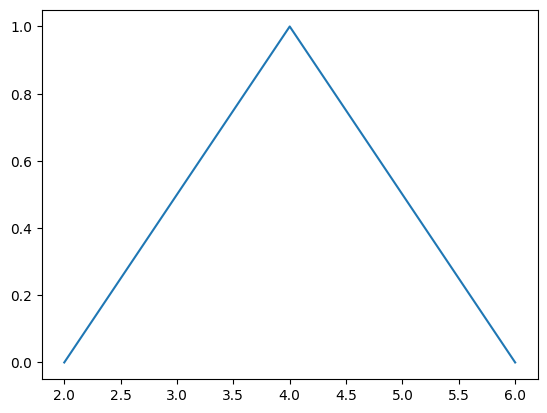

In [ ]:
a=float(input("Enter a: "))
b=float(input("Enter b: "))
m=(a+b)/2
X=(a,m,b)
Y=(0,1,0)
plt.plot(X,Y)
plt.show()

In [ ]:
#Triangular MF
x=float(input("Enter the element: "))
if x<=a or x>=m:
    mem = 0
mem1 = (x-a)/(m-a)
mem2= (b-x)/(b-m)
mem=max(min(mem1,mem2),0)
    
print("Membership : ",mem) 

Enter the element: 7
Membership :  0


Enter a: 
1
Enter b: 
5
Enter c: 
6
Enter d: 
7


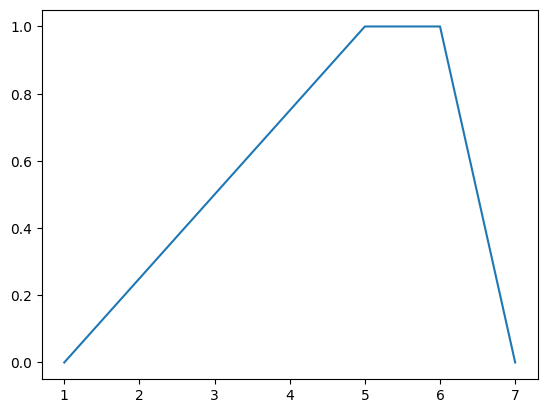

In [ ]:
print("Enter a: ")
a=input()
a=float(a)
print("Enter b: ")
b=input()
b=float(b)
print("Enter c: ")
c=input()
c=float(c)
print("Enter d: ")
d=input()
d=float(d)
X=(a,b,c,d)
Y=(0,1,1,0)
plt.plot(X,Y)
plt.show()

In [ ]:
#Trapezodial MF
x=float(input("Enter the element: "))
if x<=a or x>=d:
    mem = 0
elif x > b and x < c :
    mem = 1
else:
  mem1 = (x-a)/(b-a)
  mem2= (d-x)/(d-c)
  mem=max(min(mem1,mem2),0)
    
print("Membership : ",mem) 

Enter the element: 4
Membership :  0.75


Enter the mean: 0
Enter the variance: 2


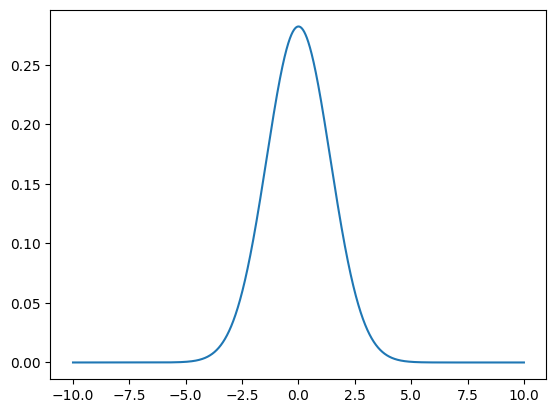

In [ ]:
#Gaussian Distribution
c=float(input("Enter the mean: "))
var=float(input("Enter the variance: "))
sig=np.sqrt(var)
x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,c,sig))
plt.show()

In [ ]:
x=float(input("Enter the element: "))

mem = np.exp((-1*(x-c)**2)/(2*var))
    
print("membership: ",mem) 

Enter the element: 2.4
membership:  0.23692775868212176


In [ ]:
import random

W = 5
weights = [3, 2, 4, 1]
values = [100, 20, 60, 40]

items = [(weight, value) for weight, value in zip(weights, values)]


def evaluate_fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(individual)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(individual)))
    if total_weight > W:
        return 0
    else:
        return total_value


def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(len(items))]
        population.append(individual)
    return population


def selection(population):
    selected = random.choices(population, k=2)
    return selected[0], selected[1]


def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(items) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual


def genetic_algorithm(population_size, num_generations, mutation_rate):
    population = initialize_population(population_size)

    for _ in range(num_generations):
        next_generation = []
        for _ in range(population_size // 2):
            parent1, parent2 = selection(population)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate)
            child2 = mutation(child2, mutation_rate)
            next_generation.extend([child1, child2])

        population = next_generation

    best_individual = max(population, key=evaluate_fitness)
    best_fitness = evaluate_fitness(best_individual)
    return best_individual, best_fitness


# Example usage
population_size = 50
num_generations = 100
mutation_rate = 0.1

best_individual, best_fitness = genetic_algorithm(population_size, num_generations, mutation_rate)

print("Best individual:", best_individual)
print("Best fitness:", best_fitness)

Best individual: [1, 0, 0, 1]
Best fitness: 140


In [ ]:
import random
import math

def calculate_distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def tsp(n, cities):
    # Generate a random permutation of cities
    route = random.sample(range(n), n)
    
    # Calculate the total distance of the initial route
    total_distance = 0
    for i in range(n - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance = calculate_distance(city1, city2)
        total_distance += distance
    
    # Connect the last city with the first city
    city1 = cities[route[n - 1]]
    city2 = cities[route[0]]
    distance = calculate_distance(city1, city2)
    total_distance += distance
    
    return route, total_distance

# Example usage
cities = [(0, 0), (1, 5), (2, 3), (5, 2)]
num_cities = len(cities)

route, total_distance = tsp(num_cities, cities)

print("Optimal Route:", route)
print("Total Distance:", total_distance)


Optimal Route: [2, 0, 1, 3]
Total Distance: 16.866848449225152


In [ ]:
import random

def is_valid(board):
    n = len(board)
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == j - i:
                return False
    return True

def queens(n=8):
    board = random.sample(range(n), n)
    print("Generated random sequence of placing 8 queen: ",board)
    while not is_valid(board):
        random.shuffle(board)
    return board

# Example usage
n = 8
solution = queens(n)
print("Solution:", solution)

Generated random sequence of placing 8 queen:  [7, 0, 6, 5, 3, 4, 1, 2]
Solution: [3, 5, 0, 4, 1, 7, 2, 6]
